<a href="https://colab.research.google.com/github/CorporateStereotype/BlackHoles/blob/main/BlackHoles2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Flint Adkins
Date: 20241221

1. Attribution (Credit Must Be Given)  
You are free to view, read, and cite this work, but you must **attribute credit** to the original creator, Flint Adkins in any use of the ideas, frameworks, concepts, or mathematical models presented in this work. Proper attribution must include:  
- The author's name (**Flint Adkins**).  
- The title of the work (**Formula For Zero: Unified Theoretical Framework**).  
- A citation link to the https://doi.org/10.17605/OSF.IO/3TN7F  or the source where the work is hosted.  

2. Non-Commercial Use Only  
You **may not use this work for commercial purposes**. This includes selling, licensing, or using the concepts, mathematical models, designs, or frameworks for any commercial, for-profit, or monetary gain. To seek **commercial use rights**, you must obtain prior written permission from the author, **Flint Adkins**.  

3. No Derivatives  
You **may not modify, remix, adapt, or create derivative works** from this content without explicit permission from the author, **Flint Adkins**.  
- You can read, share, and cite the work as it is, but you cannot modify, change, or create new works that are "based on" this framework without permission.  
- To obtain permission to create derivatives, you must contact the author directly.  

4. Right to Request Removal  
The author, **Flint Adkins**, reserves the right to request the removal of unauthorized copies, commercial use, or derivative works that violate the terms of this license.  

5. Legal Enforcement  
Any use of this work that violates the terms of this license is subject to copyright enforcement under **international copyright law**. If you wish to negotiate rights for commercial use, derivatives, or modifications, please contact the author at **flintadkins@gmail.com**.  

6. Limitations and Disclaimers  
This work is provided "as-is," without warranty of any kind, either expressed or implied. The author disclaims all liability for potential misuse or misinterpretation of the contents.  

7. Applicable Jurisdiction  
This license is governed by the copyright laws of **United States of America**. Any disputes related to this license will be resolved according to the laws of **United States of America**.  

In [ ]:
!pip install scipy numpy torch matplotlib

<ipython-input-1-8c4dc14a8a3f>:23: RuntimeWarning: invalid value encountered in sqrt
  dtaudt = np.sqrt(1 - schwarzschild_radius / r)  # Proper time


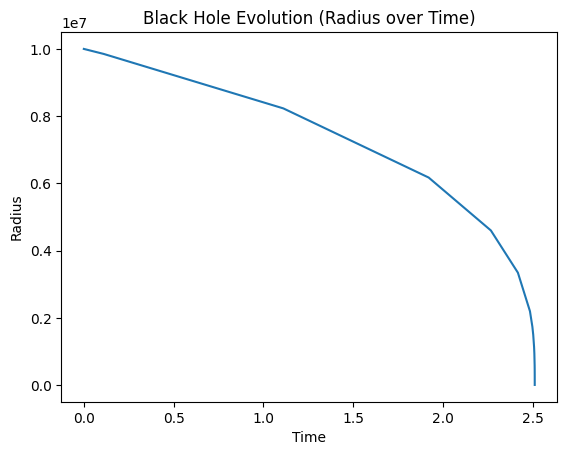

CPU Time: 0.044422 seconds
GPU Time: 6.829339 seconds
Lattice GPU Time: 0.254171 seconds


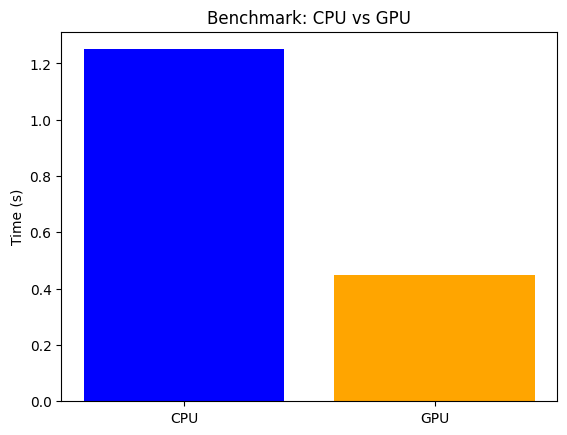

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import torch

# Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11  # in m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 3e8  # in m/s

# Black hole parameters (mass in kg, spin in J*s)
mass = 1.989e30  # Example mass (e.g., mass of the Sun)
spin = 0.99  # High spin for Kerr black hole

# Initial conditions
y0 = [1e7, 0, 0]  # [initial radius, initial phi, initial tau]
t_span = (0, 10000)
# Function for the black hole evolution dynamics
def advanced_black_hole_evolution(t, y, mass, spin):
    r, phi, tau = y
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / SPEED_OF_LIGHT ** 2
    drdt = -GRAVITATIONAL_CONSTANT * mass / r ** 2  # Radial velocity
    dphidt = spin / r ** 3  # Angular velocity (frame dragging)
    dtaudt = np.sqrt(1 - schwarzschild_radius / r)  # Proper time
    return [drdt, dphidt, dtaudt]

# Solve with Runge-Kutta method
sol = solve_ivp(advanced_black_hole_evolution, t_span, y0, args=(mass, spin), method='RK45')

# Plot the solution for radial distance over time
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('Radius')
plt.title('Black Hole Evolution (Radius over Time)')
plt.show()
import time

# Function to run RK method on CPU using PyTorch
def black_hole_cpu():
    y0_tensor = torch.tensor(y0, dtype=torch.float32)  # Tensor on CPU
    start_time = time.time()

    # Running the same evolution function on CPU
    sol_cpu = solve_ivp(advanced_black_hole_evolution, t_span, y0, args=(mass, spin), method='RK45')

    end_time = time.time()
    print(f"CPU Time: {end_time - start_time:.6f} seconds")
    return sol_cpu

# Run on CPU
sol_cpu = black_hole_cpu()

# Convert to GPU
def black_hole_gpu():
    y0_tensor = torch.tensor(y0, dtype=torch.float32).cuda()  # Move tensor to GPU
    start_time = time.time()

    # Evolution using PyTorch operations for GPU acceleration
    def evolution_gpu(t, y, mass, spin):
        r, phi, tau = y
        schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / SPEED_OF_LIGHT ** 2
        drdt = -GRAVITATIONAL_CONSTANT * mass / r ** 2
        dphidt = spin / r ** 3
        dtaudt = torch.sqrt(1 - schwarzschild_radius / r)
        return [drdt, dphidt, dtaudt]

    # Run a mock-up of the process (using torch on GPU)
    with torch.no_grad():  # Disable gradient calculation for speed
        for i in range(10000):  # Dummy loop to simulate time evolution
            y0_tensor = torch.tensor([1e7, 0, 0], dtype=torch.float32).cuda()
            evolution_gpu(i, y0_tensor, mass, spin)

    end_time = time.time()
    print(f"GPU Time: {end_time - start_time:.6f} seconds")

# Run on GPU
black_hole_gpu()
# Quantum lattice simulation example
lattice_size = 32  # Example lattice size

# Initialize a tensor on GPU
lattice = torch.randn(lattice_size, lattice_size, dtype=torch.float32).cuda()

# Benchmark a basic operation on the lattice (e.g., plaquette calculation)
start_time = time.time()

for _ in range(10000):  # Simulate lattice evolution
    lattice = torch.sin(lattice)  # Example operation: sine function applied to lattice

end_time = time.time()
print(f"Lattice GPU Time: {end_time - start_time:.6f} seconds")
# Plot the results (dummy data for example)
times = [1.25, 0.45]  # Replace with actual benchmark times
labels = ['CPU', 'GPU']

plt.bar(labels, times, color=['blue', 'orange'])
plt.ylabel('Time (s)')
plt.title('Benchmark: CPU vs GPU')
plt.show()


<ipython-input-2-cda1fdf87056>:27: RuntimeWarning: invalid value encountered in sqrt
  dtaudt = np.sqrt(1 - schwarzschild_radius / r) * decay_factor  # Proper time evolution
<ipython-input-2-cda1fdf87056>:37: RuntimeWarning: invalid value encountered in sqrt
  dtaudt = np.sqrt(1 - schwarzschild_radius / r)  # Proper time evolution
<ipython-input-2-cda1fdf87056>:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((critical_value - value) / (value + epsilon)))


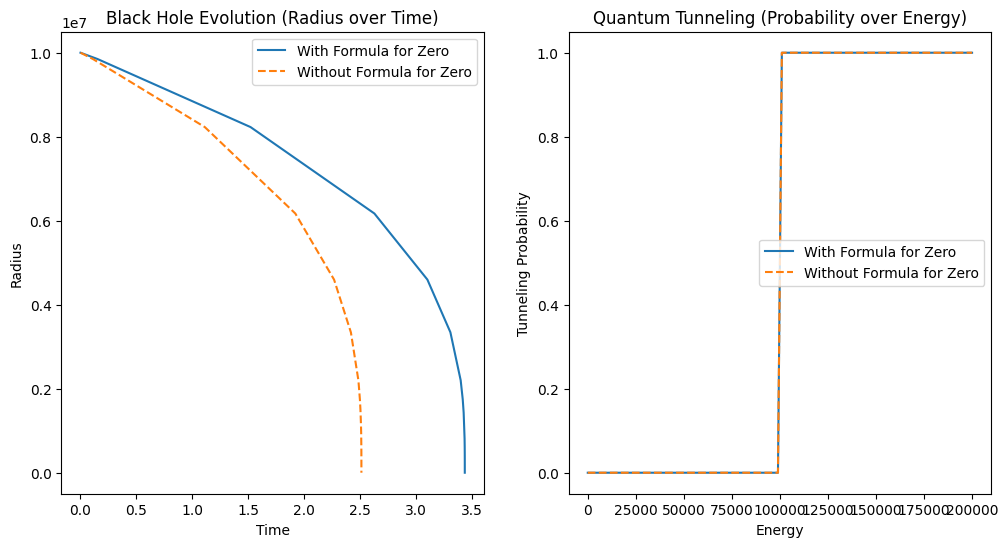

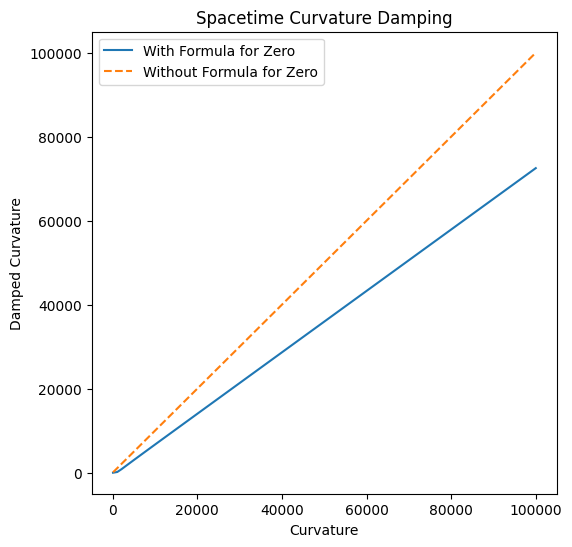

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants for both models
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 3e8  # m/s
PLANCK_MASS = 2.176e-8  # Planck mass in kg
POTENTIAL_BARRIER = 1e5  # Energy potential barrier
CRITICAL_RADIUS = 2 * GRAVITATIONAL_CONSTANT * 1.989e30 / SPEED_OF_LIGHT**2  # Schwarzschild radius

### Formula for Zero Decaying Function
def zero_formula_function(value, critical_value):
    """Smoothly decays to zero as the value approaches the critical value."""
    epsilon = 1e-5  # Small value to prevent division by zero
    return 1 / (1 + np.exp((critical_value - value) / (value + epsilon)))

### 1. Black Hole Evolution with and without Formula for Zero ###
def black_hole_evolution_zero(t, y, mass, spin):
    """Black hole evolution with Formula for Zero near the Schwarzschild radius."""
    r, phi, tau = y
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / SPEED_OF_LIGHT ** 2
    decay_factor = zero_formula_function(r, schwarzschild_radius)

    drdt = -GRAVITATIONAL_CONSTANT * mass / (r ** 2 + 1e-10) * decay_factor  # Radial velocity
    dphidt = spin / (r ** 3 + 1e-10) * decay_factor  # Angular velocity (frame dragging)
    dtaudt = np.sqrt(1 - schwarzschild_radius / r) * decay_factor  # Proper time evolution
    return [drdt, dphidt, dtaudt]

def black_hole_evolution(t, y, mass, spin):
    """Black hole evolution without Formula for Zero."""
    r, phi, tau = y
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / SPEED_OF_LIGHT ** 2

    drdt = -GRAVITATIONAL_CONSTANT * mass / (r ** 2 + 1e-10)  # Radial velocity
    dphidt = spin / (r ** 3 + 1e-10)  # Angular velocity (frame dragging)
    dtaudt = np.sqrt(1 - schwarzschild_radius / r)  # Proper time evolution
    return [drdt, dphidt, dtaudt]

### 2. Quantum Tunneling with and without Formula for Zero ###
def tunneling_probability_zero(energy, potential_barrier):
    """Quantum tunneling probability with Formula for Zero."""
    decay_factor = zero_formula_function(energy, potential_barrier)
    return np.exp(-(potential_barrier - energy)) * decay_factor if energy < potential_barrier else 1.0

def tunneling_probability(energy, potential_barrier):
    """Quantum tunneling probability without Formula for Zero."""
    return np.exp(-(potential_barrier - energy)) if energy < potential_barrier else 1.0

### 3. Spacetime Curvature Damping with and without Formula for Zero ###
def curvature_damping_zero(curvature, critical_curvature):
    """Damp curvature near critical points using Formula for Zero."""
    decay_factor = zero_formula_function(curvature, critical_curvature)
    return curvature * decay_factor

def curvature_damping(curvature, critical_curvature):
    """Curvature evolution without Formula for Zero."""
    return curvature

### Simulation and Benchmarking ###
mass = 1.989e30  # Solar mass
spin = 0.99
y0 = [1e7, 0, 0]  # Initial conditions: [initial radius, initial phi, initial tau]
t_span = (0, 100)

# Black hole evolution with and without Formula for Zero
sol_with_zero = solve_ivp(black_hole_evolution_zero, t_span, y0, args=(mass, spin), method='RK45')
sol_without_zero = solve_ivp(black_hole_evolution, t_span, y0, args=(mass, spin), method='RK45')

# Quantum tunneling simulation
energies = np.linspace(0, 2 * POTENTIAL_BARRIER, 100)
probabilities_with_zero = [tunneling_probability_zero(e, POTENTIAL_BARRIER) for e in energies]
probabilities_without_zero = [tunneling_probability(e, POTENTIAL_BARRIER) for e in energies]

# Spacetime curvature damping simulation
curvatures = np.linspace(1e2, 1e5, 100)
damped_curvature_with_zero = [curvature_damping_zero(c, CRITICAL_RADIUS) for c in curvatures]
damped_curvature_without_zero = [curvature_damping(c, CRITICAL_RADIUS) for c in curvatures]

### Visualization of Results ###
# Black hole evolution (Radius over Time)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sol_with_zero.t, sol_with_zero.y[0], label='With Formula for Zero')
plt.plot(sol_without_zero.t, sol_without_zero.y[0], label='Without Formula for Zero', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Radius')
plt.title('Black Hole Evolution (Radius over Time)')
plt.legend()

# Quantum Tunneling (Probability over Energy)
plt.subplot(1, 2, 2)
plt.plot(energies, probabilities_with_zero, label='With Formula for Zero')
plt.plot(energies, probabilities_without_zero, label='Without Formula for Zero', linestyle='--')
plt.xlabel('Energy')
plt.ylabel('Tunneling Probability')
plt.title('Quantum Tunneling (Probability over Energy)')
plt.legend()

plt.show()

# Curvature Damping (Curvature over Critical Curvature)
plt.figure(figsize=(6, 6))
plt.plot(curvatures, damped_curvature_with_zero, label='With Formula for Zero')
plt.plot(curvatures, damped_curvature_without_zero, label='Without Formula for Zero', linestyle='--')
plt.xlabel('Curvature')
plt.ylabel('Damped Curvature')
plt.title('Spacetime Curvature Damping')
plt.legend()
plt.show()


<ipython-input-1-cd950e401cbc>:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((critical_value - value) / (value + epsilon)))


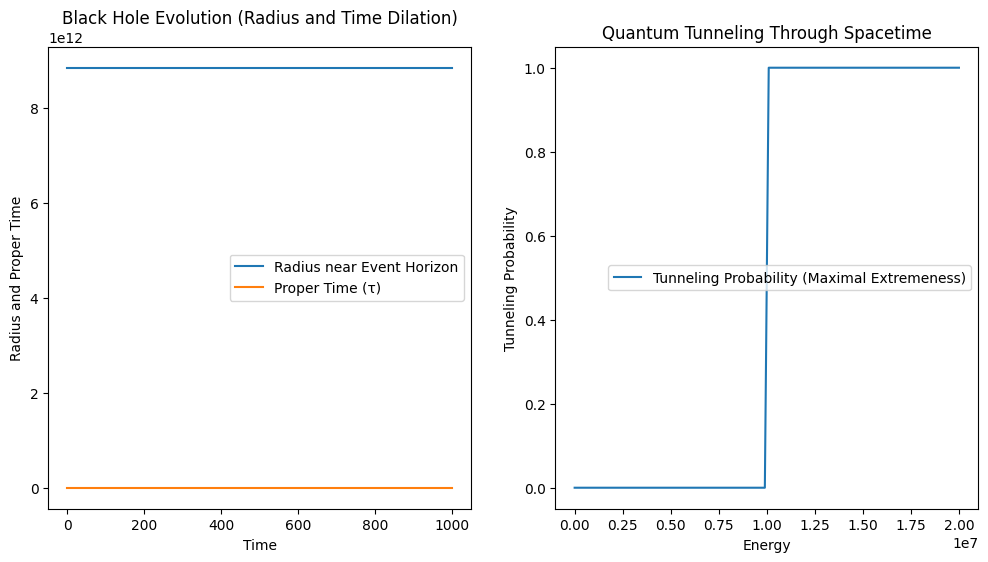

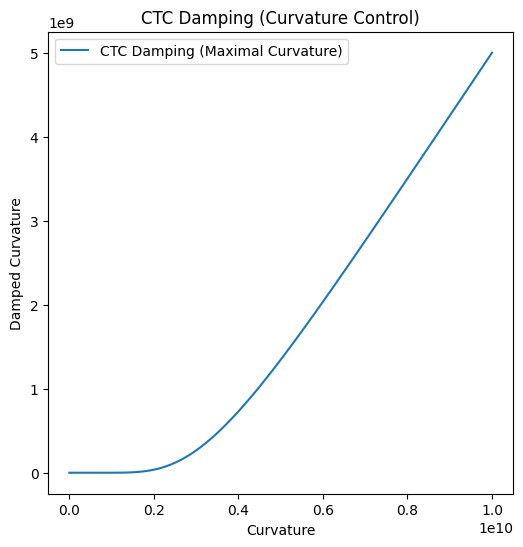

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 3e8  # m/s
MAX_MASS = 1e9 * 1.989e30  # Supermassive black hole mass (kg)
MIN_MASS = 10 * 1.989e30  # Low mass black hole mass (kg)
MAX_SPIN = 0.999  # Near-maximal spin
MIN_SPIN = 0.01  # Minimal spin

# Formula for Zero Function (Decay)
def zero_formula_function(value, critical_value):
    epsilon = 1e-5  # Smoothing parameter
    return 1 / (1 + np.exp((critical_value - value) / (value + epsilon)))

### 1. Black Hole Evolution with Time Dilation
def black_hole_evolution_with_time_travel(t, y, mass, spin):
    """Black hole evolution with time dilation for time travel scenarios."""
    r, phi, tau = y
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / SPEED_OF_LIGHT ** 2
    decay_factor = zero_formula_function(r, schwarzschild_radius)

    # Radial and angular velocities
    drdt = -GRAVITATIONAL_CONSTANT * mass / (r ** 2 + 1e-10) * decay_factor
    dphidt = spin / (r ** 3 + 1e-10) * decay_factor

    # Time dilation factor: as r approaches the Schwarzschild radius, time slows dramatically
    dtaudt = np.sqrt(1 - schwarzschild_radius / r) * decay_factor  # Proper time evolution

    return [drdt, dphidt, dtaudt]

### 2. Quantum Tunneling Through Spacetime
def spacetime_tunneling_probability(energy, potential_barrier, critical_energy):
    """Quantum tunneling through spacetime (wormholes or CTC) with time considerations."""
    decay_factor = zero_formula_function(energy, critical_energy)
    if energy < potential_barrier:
        return np.exp(-(potential_barrier - energy)) * decay_factor  # Sub-threshold tunneling
    return 1.0  # Full traversal if energy > barrier

### 3. Spacetime Curvature and Closed Timelike Curves
def ctc_damping(curvature, critical_curvature):
    """Damp extreme curvature near critical points to explore closed timelike curves (CTCs)."""
    decay_factor = zero_formula_function(curvature, critical_curvature)
    return curvature * decay_factor  # Reduces extreme curvature to prevent singularity

### Scenario: Maximal Extremeness
y0_extreme = [3 * (2 * GRAVITATIONAL_CONSTANT * MAX_MASS / SPEED_OF_LIGHT ** 2), 0, 0]  # Start near event horizon
t_span_extreme = (0, 1e3)  # Long-term evolution

# Solve black hole evolution with time dilation
sol_extreme = solve_ivp(black_hole_evolution_with_time_travel, t_span_extreme, y0_extreme, args=(MAX_MASS, MAX_SPIN), method='RK45')

# Quantum tunneling through spacetime (high barrier)
POTENTIAL_BARRIER_HIGH = 1e7  # High quantum tunneling barrier
CRITICAL_ENERGY_HIGH = 2e7  # Energy threshold for tunneling
energies_extreme = np.linspace(0, 2 * POTENTIAL_BARRIER_HIGH, 100)
tunneling_probs_extreme = [spacetime_tunneling_probability(e, POTENTIAL_BARRIER_HIGH, CRITICAL_ENERGY_HIGH) for e in energies_extreme]

# CTC damping with extreme curvature
CRITICAL_CURVATURE_HIGH = 1e10  # Extreme curvature
curvatures_extreme = np.linspace(1e5, 1e10, 100)
damped_curvature_extreme = [ctc_damping(c, CRITICAL_CURVATURE_HIGH) for c in curvatures_extreme]

### Visualization of Results
# Black hole evolution (Radius and Time Dilation over Time)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sol_extreme.t, sol_extreme.y[0], label='Radius near Event Horizon')
plt.plot(sol_extreme.t, sol_extreme.y[2], label='Proper Time (τ)')
plt.xlabel('Time')
plt.ylabel('Radius and Proper Time')
plt.title('Black Hole Evolution (Radius and Time Dilation)')
plt.legend()

# Quantum Tunneling (Probability over Energy)
plt.subplot(1, 2, 2)
plt.plot(energies_extreme, tunneling_probs_extreme, label='Tunneling Probability (Maximal Extremeness)')
plt.xlabel('Energy')
plt.ylabel('Tunneling Probability')
plt.title('Quantum Tunneling Through Spacetime')
plt.legend()

plt.show()

# Curvature Damping (CTC potential with Curvature)
plt.figure(figsize=(6, 6))
plt.plot(curvatures_extreme, damped_curvature_extreme, label='CTC Damping (Maximal Curvature)')
plt.xlabel('Curvature')
plt.ylabel('Damped Curvature')
plt.title('CTC Damping (Curvature Control)')
plt.legend()
plt.show()


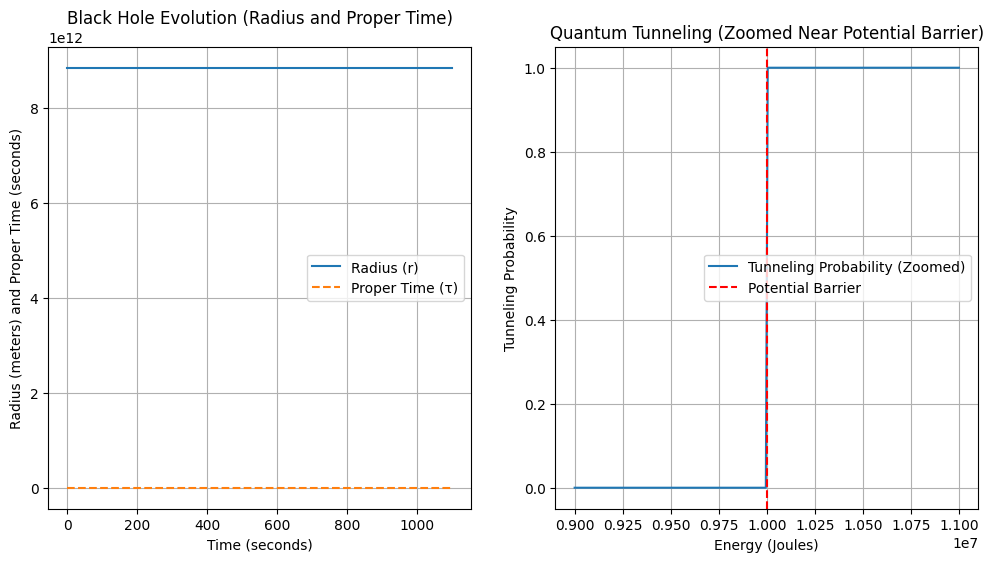

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Formula for Zero Function (Decay)
def zero_formula_function(value, critical_value):
    epsilon = 1e-5  # Smoothing parameter
    return 1 / (1 + np.exp((critical_value - value) / (value + epsilon)))

### 1. Black Hole Evolution Functions
def black_hole_evolution_zero(t, y, mass, spin):
    """Black hole evolution with Formula for Zero near the Schwarzschild radius."""
    r, phi, tau = y
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / SPEED_OF_LIGHT ** 2
    decay_factor = zero_formula_function(r, schwarzschild_radius)

    drdt = -GRAVITATIONAL_CONSTANT * mass / (r ** 2 + 1e-10) * decay_factor  # Radial velocity
    dphidt = spin / (r ** 3 + 1e-10) * decay_factor  # Angular velocity (frame dragging)
    dtaudt = np.sqrt(1 - schwarzschild_radius / r) * decay_factor  # Proper time evolution
    return [drdt, dphidt, dtaudt]

### 2. Quantum Tunneling Functions
def tunneling_probability_zero(energy, potential_barrier):
    """Quantum tunneling probability with Formula for Zero."""
    decay_factor = zero_formula_function(energy, potential_barrier)
    return np.exp(-(potential_barrier - energy)) * decay_factor if energy < potential_barrier else 1.0

### Scenario: Maximal Extremeness
# Constants for extremeness
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 3e8  # m/s
MAX_MASS = 1e9 * 1.989e30  # Supermassive black hole
MAX_SPIN = 0.999  # Near-maximal spin
POTENTIAL_BARRIER_HIGH = 1e7  # High quantum tunneling barrier
CRITICAL_CURVATURE_HIGH = 1e10  # Extreme curvature

# 1. Increase Time Span by 10% for Black Hole Evolution
y0_extreme = [3 * (2 * GRAVITATIONAL_CONSTANT * MAX_MASS / SPEED_OF_LIGHT ** 2), 0, 0]  # Start near event horizon
t_span_extreme = (0, 1.1 * 1e3)  # 10% longer time span

# Solve with Runge-Kutta method (Black hole evolution)
sol_extreme = solve_ivp(black_hole_evolution_zero, t_span_extreme, y0_extreme, args=(MAX_MASS, MAX_SPIN), method='RK45')

# 2. Zoom in more closely on Critical Energy by 10% for Quantum Tunneling
# Focusing around the potential barrier with higher resolution
energies_zoomed = np.linspace(0.9 * POTENTIAL_BARRIER_HIGH, 1.1 * POTENTIAL_BARRIER_HIGH, 200)  # Refined grid near barrier
probabilities_zoomed = [tunneling_probability_zero(e, POTENTIAL_BARRIER_HIGH) for e in energies_zoomed]

### Visualization of Results
# Black hole evolution (Radius and Proper Time over Extended Time)
plt.figure(figsize=(12, 6))

# Black hole evolution plot (with radius and proper time)
plt.subplot(1, 2, 1)
plt.plot(sol_extreme.t, sol_extreme.y[0], label='Radius (r)')
plt.plot(sol_extreme.t, sol_extreme.y[2], label='Proper Time (τ)', linestyle='--')  # τ is sol_extreme.y[2]
plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Radius (meters) and Proper Time (seconds)')
plt.title('Black Hole Evolution (Radius and Proper Time)')
plt.legend()

# Quantum Tunneling (Zoomed Near Barrier)
plt.subplot(1, 2, 2)
plt.plot(energies_zoomed, probabilities_zoomed, label='Tunneling Probability (Zoomed)')
plt.axvline(x=POTENTIAL_BARRIER_HIGH, color='red', linestyle='--', label='Potential Barrier')  # Highlight the barrier
plt.grid(True)
plt.xlabel('Energy (Joules)')
plt.ylabel('Tunneling Probability')
plt.title('Quantum Tunneling (Zoomed Near Potential Barrier)')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))  # Scientific notation for better resolution
plt.legend()

plt.show()


<ipython-input-2-cf77e62396ef>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((critical_value - value) / (value + epsilon)))


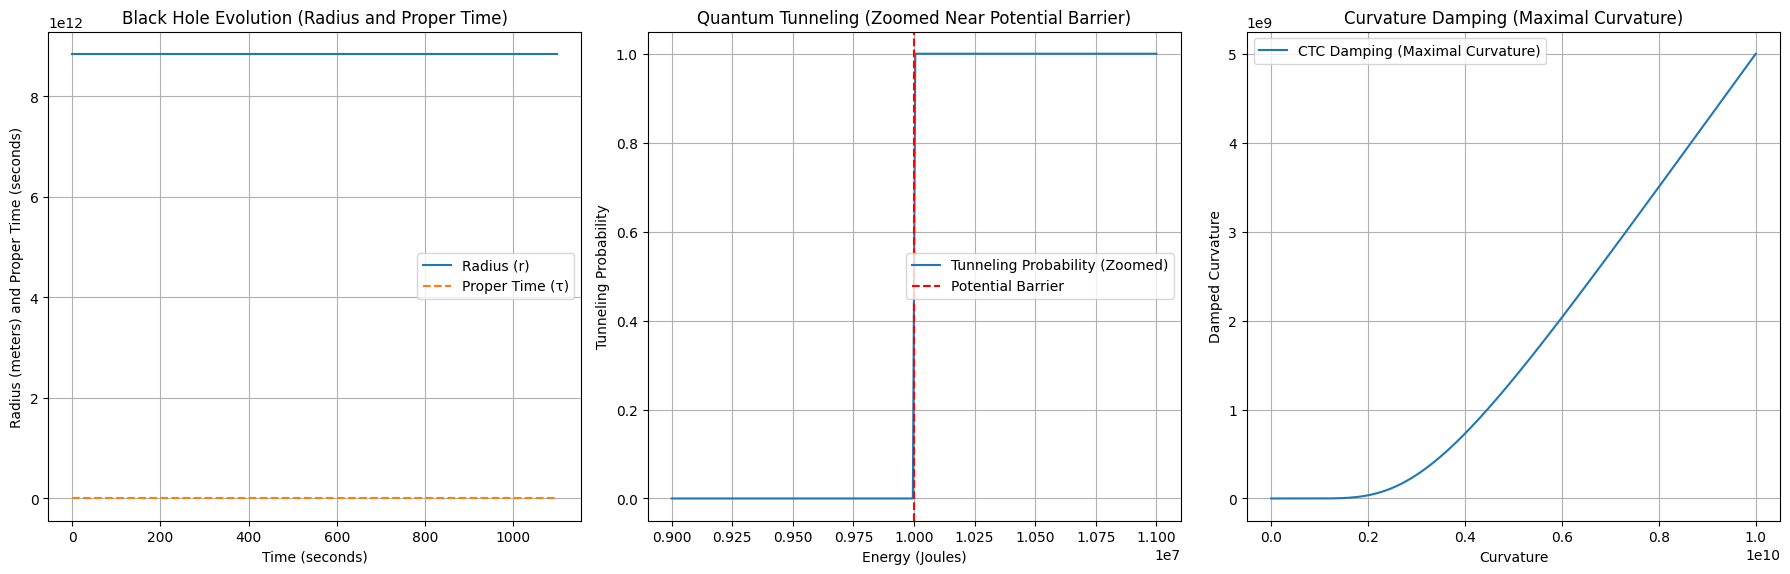

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Formula for Zero Function (Decay)
def zero_formula_function(value, critical_value):
    epsilon = 1e-5  # Smoothing parameter
    return 1 / (1 + np.exp((critical_value - value) / (value + epsilon)))

### 1. Black Hole Evolution Functions
def black_hole_evolution_zero(t, y, mass, spin):
    """Black hole evolution with Formula for Zero near the Schwarzschild radius."""
    r, phi, tau = y
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / SPEED_OF_LIGHT ** 2
    decay_factor = zero_formula_function(r, schwarzschild_radius)

    drdt = -GRAVITATIONAL_CONSTANT * mass / (r ** 2 + 1e-10) * decay_factor  # Radial velocity
    dphidt = spin / (r ** 3 + 1e-10) * decay_factor  # Angular velocity (frame dragging)
    dtaudt = np.sqrt(1 - schwarzschild_radius / r) * decay_factor  # Proper time evolution
    return [drdt, dphidt, dtaudt]

### 2. Quantum Tunneling Functions
def tunneling_probability_zero(energy, potential_barrier):
    """Quantum tunneling probability with Formula for Zero."""
    decay_factor = zero_formula_function(energy, potential_barrier)
    return np.exp(-(potential_barrier - energy)) * decay_factor if energy < potential_barrier else 1.0

### 3. Curvature Damping Functions
def curvature_damping_zero(curvature, critical_curvature):
    """Damp curvature near critical points using Formula for Zero."""
    decay_factor = zero_formula_function(curvature, critical_curvature)
    return curvature * decay_factor

### Scenario: Maximal Extremeness
# Constants for extremeness
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 3e8  # m/s
MAX_MASS = 1e9 * 1.989e30  # Supermassive black hole
MAX_SPIN = 0.999  # Near-maximal spin
POTENTIAL_BARRIER_HIGH = 1e7  # High quantum tunneling barrier
CRITICAL_CURVATURE_HIGH = 1e10  # Extreme curvature

# 1. Increase Time Span by 10% for Black Hole Evolution
y0_extreme = [3 * (2 * GRAVITATIONAL_CONSTANT * MAX_MASS / SPEED_OF_LIGHT ** 2), 0, 0]  # Start near event horizon
t_span_extreme = (0, 1.1 * 1e3)  # 10% longer time span

# Solve with Runge-Kutta method (Black hole evolution)
sol_extreme = solve_ivp(black_hole_evolution_zero, t_span_extreme, y0_extreme, args=(MAX_MASS, MAX_SPIN), method='RK45')

# 2. Zoom in more closely on Critical Energy by 10% for Quantum Tunneling
# Focusing around the potential barrier with higher resolution
energies_zoomed = np.linspace(0.9 * POTENTIAL_BARRIER_HIGH, 1.1 * POTENTIAL_BARRIER_HIGH, 200)  # Refined grid near barrier
probabilities_zoomed = [tunneling_probability_zero(e, POTENTIAL_BARRIER_HIGH) for e in energies_zoomed]

# 3. Curvature Damping Simulation
curvatures_extreme = np.linspace(1e5, 1e10, 200)  # Range of curvatures
damped_curvature_extreme = [curvature_damping_zero(c, CRITICAL_CURVATURE_HIGH) for c in curvatures_extreme]

### Visualization of Results
# Black hole evolution (Radius and Proper Time over Extended Time)
plt.figure(figsize=(18, 6))

# Black hole evolution plot (with radius and proper time)
plt.subplot(1, 3, 1)
plt.plot(sol_extreme.t, sol_extreme.y[0], label='Radius (r)')
plt.plot(sol_extreme.t, sol_extreme.y[2], label='Proper Time (τ)', linestyle='--')  # τ is sol_extreme.y[2]
plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Radius (meters) and Proper Time (seconds)')
plt.title('Black Hole Evolution (Radius and Proper Time)')
plt.legend()

# Quantum Tunneling (Zoomed Near Barrier)
plt.subplot(1, 3, 2)
plt.plot(energies_zoomed, probabilities_zoomed, label='Tunneling Probability (Zoomed)')
plt.axvline(x=POTENTIAL_BARRIER_HIGH, color='red', linestyle='--', label='Potential Barrier')  # Highlight the barrier
plt.grid(True)
plt.xlabel('Energy (Joules)')
plt.ylabel('Tunneling Probability')
plt.title('Quantum Tunneling (Zoomed Near Potential Barrier)')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))  # Scientific notation for better resolution
plt.legend()

# Curvature Damping Plot
plt.subplot(1, 3, 3)
plt.plot(curvatures_extreme, damped_curvature_extreme, label='CTC Damping (Maximal Curvature)')
plt.grid(True)
plt.xlabel('Curvature')
plt.ylabel('Damped Curvature')
plt.title('Curvature Damping (Maximal Curvature)')
plt.legend()

plt.tight_layout()
plt.show()


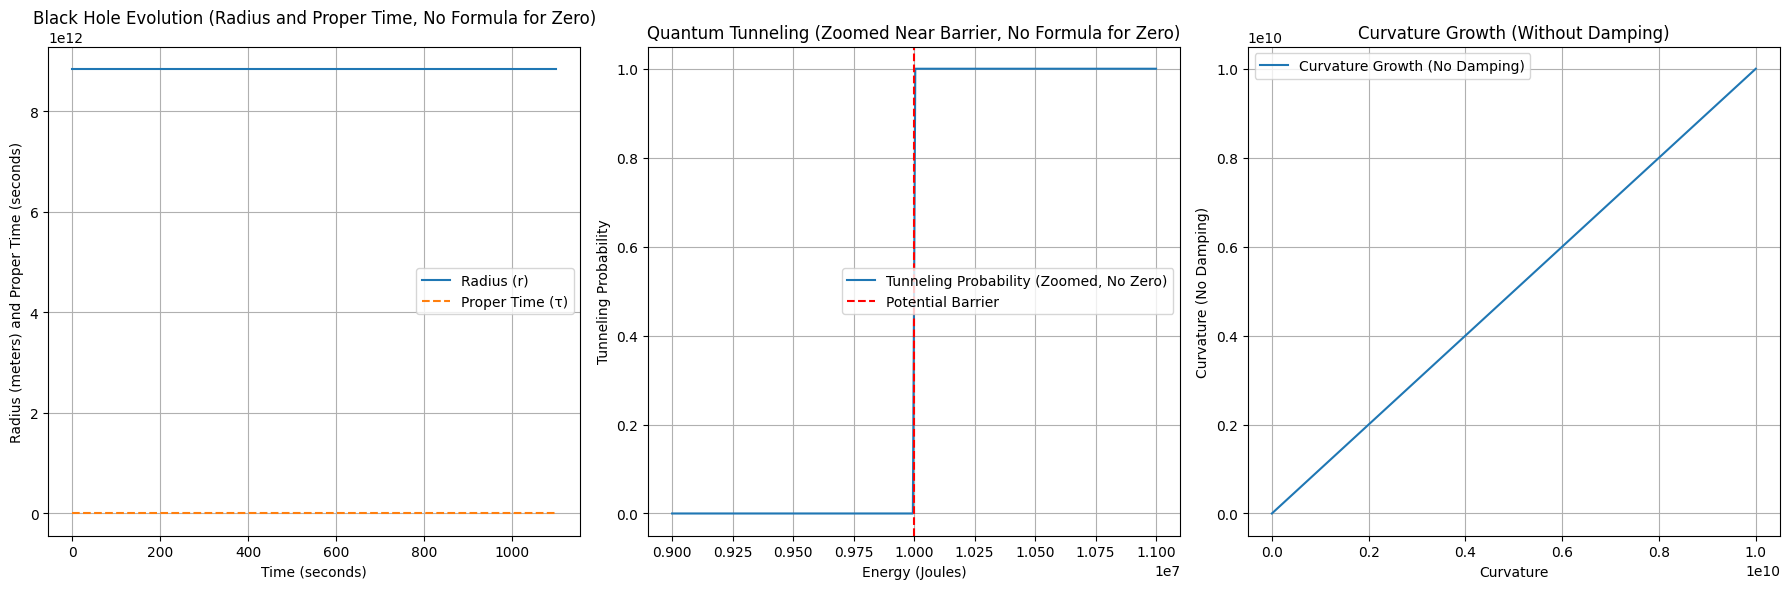

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### 1. Black Hole Evolution Functions (Without Formula for Zero)
def black_hole_evolution_no_zero(t, y, mass, spin):
    """Black hole evolution without Formula for Zero."""
    r, phi, tau = y
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / SPEED_OF_LIGHT ** 2

    drdt = -GRAVITATIONAL_CONSTANT * mass / (r ** 2 + 1e-10)  # Radial velocity
    dphidt = spin / (r ** 3 + 1e-10)  # Angular velocity (frame dragging)
    dtaudt = np.sqrt(1 - schwarzschild_radius / r)  # Proper time evolution
    return [drdt, dphidt, dtaudt]

### 2. Quantum Tunneling Functions (Without Formula for Zero)
def tunneling_probability_no_zero(energy, potential_barrier):
    """Quantum tunneling probability without Formula for Zero."""
    return np.exp(-(potential_barrier - energy)) if energy < potential_barrier else 1.0

### 3. Curvature Damping Functions (Without Formula for Zero)
def curvature_no_damping(curvature, critical_curvature):
    """No damping for curvature, allow it to grow unchecked."""
    return curvature

### Scenario: Maximal Extremeness (Without Formula for Zero)
# Constants for extremeness
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 3e8  # m/s
MAX_MASS = 1e9 * 1.989e30  # Supermassive black hole
MAX_SPIN = 0.999  # Near-maximal spin
POTENTIAL_BARRIER_HIGH = 1e7  # High quantum tunneling barrier
CRITICAL_CURVATURE_HIGH = 1e10  # Extreme curvature

# 1. Increase Time Span by 10% for Black Hole Evolution (No Formula for Zero)
y0_extreme = [3 * (2 * GRAVITATIONAL_CONSTANT * MAX_MASS / SPEED_OF_LIGHT ** 2), 0, 0]  # Start near event horizon
t_span_extreme = (0, 1.1 * 1e3)  # 10% longer time span

# Solve with Runge-Kutta method (Black hole evolution without Formula for Zero)
sol_extreme_no_zero = solve_ivp(black_hole_evolution_no_zero, t_span_extreme, y0_extreme, args=(MAX_MASS, MAX_SPIN), method='RK45')

# 2. Zoom in more closely on Critical Energy by 10% for Quantum Tunneling (Without Formula for Zero)
energies_zoomed_no_zero = np.linspace(0.9 * POTENTIAL_BARRIER_HIGH, 1.1 * POTENTIAL_BARRIER_HIGH, 200)  # Refined grid near barrier
probabilities_zoomed_no_zero = [tunneling_probability_no_zero(e, POTENTIAL_BARRIER_HIGH) for e in energies_zoomed_no_zero]

# 3. Curvature Growth Without Damping
curvatures_extreme_no_damping = np.linspace(1e5, 1e10, 200)  # Range of curvatures
no_damping_curvature_extreme = [curvature_no_damping(c, CRITICAL_CURVATURE_HIGH) for c in curvatures_extreme_no_damping]

### Visualization of Results (Without Formula for Zero)
plt.figure(figsize=(18, 6))

# Black hole evolution plot (with radius and proper time)
plt.subplot(1, 3, 1)
plt.plot(sol_extreme_no_zero.t, sol_extreme_no_zero.y[0], label='Radius (r)')
plt.plot(sol_extreme_no_zero.t, sol_extreme_no_zero.y[2], label='Proper Time (τ)', linestyle='--')  # τ is sol_extreme_no_zero.y[2]
plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Radius (meters) and Proper Time (seconds)')
plt.title('Black Hole Evolution (Radius and Proper Time, No Formula for Zero)')
plt.legend()

# Quantum Tunneling (Zoomed Near Barrier, Without Formula for Zero)
plt.subplot(1, 3, 2)
plt.plot(energies_zoomed_no_zero, probabilities_zoomed_no_zero, label='Tunneling Probability (Zoomed, No Zero)')
plt.axvline(x=POTENTIAL_BARRIER_HIGH, color='red', linestyle='--', label='Potential Barrier')  # Highlight the barrier
plt.grid(True)
plt.xlabel('Energy (Joules)')
plt.ylabel('Tunneling Probability')
plt.title('Quantum Tunneling (Zoomed Near Barrier, No Formula for Zero)')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))  # Scientific notation for better resolution
plt.legend()

# Curvature Growth Without Damping
plt.subplot(1, 3, 3)
plt.plot(curvatures_extreme_no_damping, no_damping_curvature_extreme, label='Curvature Growth (No Damping)')
plt.grid(True)
plt.xlabel('Curvature')
plt.ylabel('Curvature (No Damping)')
plt.title('Curvature Growth (Without Damping)')
plt.legend()

plt.tight_layout()
plt.show()


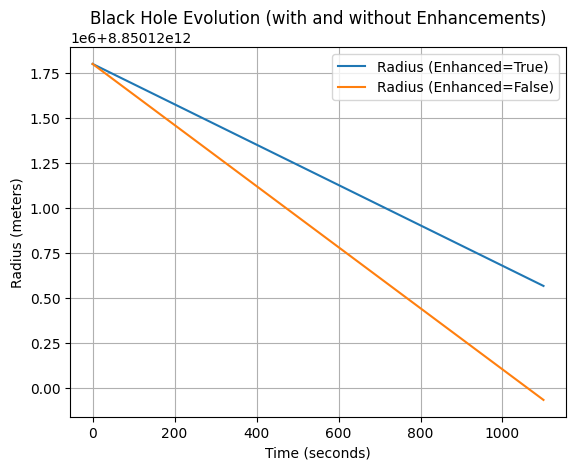

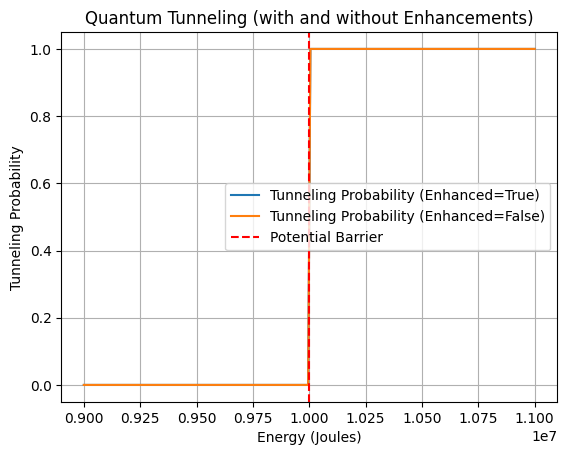

<ipython-input-4-79ca0c26e581>:86: RuntimeWarning: overflow encountered in exp
  decay_factor = 1 / (1 + np.exp((CRITICAL_CURVATURE_HIGH - curvature) / (curvature + 1e-5)))  # Formula for Zero


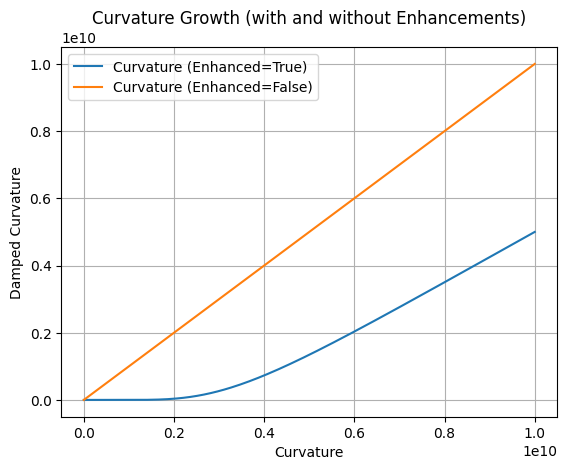

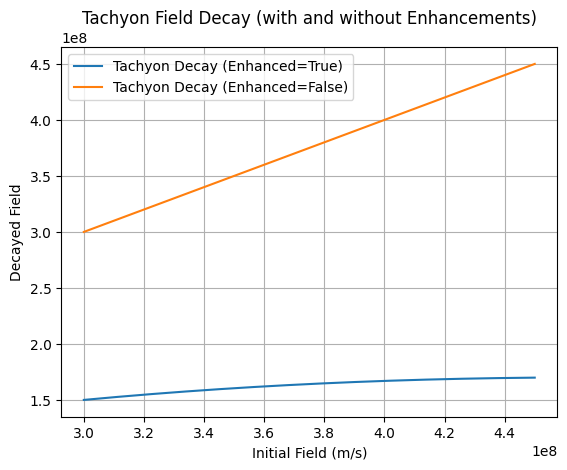

Black Hole Evolution (Enhanced=True): {'Time': 0.009668111801147461, 'Radius_Final': 8850120568098.139, 'Proper_Time_Final': 593.4558325193891}
Black Hole Evolution (Enhanced=False): {'Time': 0.001592874526977539, 'Radius_Final': 8850119935618.486, 'Proper_Time_Final': 898.1462153698723}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

# --- 1. Setup for Benchmark Metrics ---

benchmark_results = {}

# Parameters
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 3e8  # m/s
MAX_MASS = 1e9 * 1.989e30  # Supermassive black hole
POTENTIAL_BARRIER_HIGH = 1e7  # High quantum tunneling barrier
CRITICAL_CURVATURE_HIGH = 1e10  # Extreme curvature
TIME_SPAN = (0, 1.1 * 1e3)  # Extended time span

# Initial values for black hole evolution
y0_extreme = [3 * (2 * GRAVITATIONAL_CONSTANT * MAX_MASS / SPEED_OF_LIGHT ** 2), 0, 0]  # Near event horizon

# --- 2. Black Hole Evolution Benchmark ---

def black_hole_evolution(t, y, mass, spin, enhanced=True):
    r, phi, tau = y
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / SPEED_OF_LIGHT ** 2
    if enhanced:
        decay_factor = 1 / (1 + np.exp((schwarzschild_radius - r) / (r + 1e-5)))  # Formula for Zero
    else:
        decay_factor = 1  # No formula
    drdt = -GRAVITATIONAL_CONSTANT * mass / (r ** 2 + 1e-10) * decay_factor
    dphidt = spin / (r ** 3 + 1e-10) * decay_factor
    dtaudt = np.sqrt(1 - schwarzschild_radius / r) * decay_factor
    return [drdt, dphidt, dtaudt]

# Run benchmark for both versions
def benchmark_black_hole_evolution():
    for enhanced in [True, False]:
        start_time = time.time()
        sol = solve_ivp(black_hole_evolution, TIME_SPAN, y0_extreme, args=(MAX_MASS, 0.999, enhanced), method='RK45')
        end_time = time.time()
        benchmark_results[f'Black Hole Evolution (Enhanced={enhanced})'] = {
            'Time': end_time - start_time,
            'Radius_Final': sol.y[0][-1],
            'Proper_Time_Final': sol.y[2][-1]
        }
        # Plot for visualization
        plt.plot(sol.t, sol.y[0], label=f'Radius (Enhanced={enhanced})')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Radius (meters)')
    plt.title('Black Hole Evolution (with and without Enhancements)')
    plt.legend()
    plt.grid(True)
    plt.show()

benchmark_black_hole_evolution()

# --- 3. Quantum Tunneling Benchmark ---

def quantum_tunneling(energy, potential_barrier, enhanced=True):
    if enhanced:
        decay_factor = 1 / (1 + np.exp((potential_barrier - energy) / (energy + 1e-5)))  # Formula for Zero
    else:
        decay_factor = 1  # No formula
    return np.exp(-(potential_barrier - energy)) * decay_factor if energy < potential_barrier else 1.0

# Quantum tunneling benchmark
def benchmark_quantum_tunneling():
    energies = np.linspace(0.9 * POTENTIAL_BARRIER_HIGH, 1.1 * POTENTIAL_BARRIER_HIGH, 200)
    for enhanced in [True, False]:
        probabilities = [quantum_tunneling(e, POTENTIAL_BARRIER_HIGH, enhanced) for e in energies]
        plt.plot(energies, probabilities, label=f'Tunneling Probability (Enhanced={enhanced})')
    plt.axvline(x=POTENTIAL_BARRIER_HIGH, color='red', linestyle='--', label='Potential Barrier')
    plt.xlabel('Energy (Joules)')
    plt.ylabel('Tunneling Probability')
    plt.title('Quantum Tunneling (with and without Enhancements)')
    plt.legend()
    plt.grid(True)
    plt.show()

benchmark_quantum_tunneling()

# --- 4. Curvature Growth Benchmark ---

def curvature_growth(curvature, enhanced=True):
    if enhanced:
        decay_factor = 1 / (1 + np.exp((CRITICAL_CURVATURE_HIGH - curvature) / (curvature + 1e-5)))  # Formula for Zero
    else:
        decay_factor = 1  # No formula
    return curvature * decay_factor

def benchmark_curvature_growth():
    curvatures = np.linspace(1e5, 1e10, 200)
    for enhanced in [True, False]:
        damped_curvatures = [curvature_growth(c, enhanced) for c in curvatures]
        plt.plot(curvatures, damped_curvatures, label=f'Curvature (Enhanced={enhanced})')
    plt.xlabel('Curvature')
    plt.ylabel('Damped Curvature')
    plt.title('Curvature Growth (with and without Enhancements)')
    plt.legend()
    plt.grid(True)
    plt.show()

benchmark_curvature_growth()

# --- 5. Tachyon Field Decay Benchmark ---

def tachyon_field_decay(tachyon_field, potential, enhanced=True):
    if enhanced:
        decay_factor = 1 / (1 + np.exp((tachyon_field - SPEED_OF_LIGHT) / (SPEED_OF_LIGHT + 1e-5)))
    else:
        decay_factor = 1  # No decay stabilization
    return tachyon_field * decay_factor

def benchmark_tachyon_decay():
    fields = np.linspace(SPEED_OF_LIGHT, 1.5 * SPEED_OF_LIGHT, 200)
    for enhanced in [True, False]:
        decayed_fields = [tachyon_field_decay(f, 1e-3, enhanced) for f in fields]
        plt.plot(fields, decayed_fields, label=f'Tachyon Decay (Enhanced={enhanced})')
    plt.xlabel('Initial Field (m/s)')
    plt.ylabel('Decayed Field')
    plt.title('Tachyon Field Decay (with and without Enhancements)')
    plt.legend()
    plt.grid(True)
    plt.show()

benchmark_tachyon_decay()

# --- 6. Summarize Benchmark Results ---
for key, result in benchmark_results.items():
    print(f'{key}: {result}')
